In [1]:
import pandas as pd

In [2]:
NODES = ['MGSES_CT123', 'MGSES_CT456']

In [33]:
df_bids = pd.read_csv('../../ercot_market_study/data/energy_bids_dataset.csv')
df_bids["date"] = pd.to_datetime(df_bids["deliveryDate"]) + pd.to_timedelta(df_bids["hourEnding"] - 1, unit="h")
df_awarded_bids = pd.read_csv('../../ercot_market_study/data/energy_bid_award_dataset.csv')
df_awarded_bids["date"] = pd.to_datetime(df_awarded_bids["deliveryDate"]) + pd.to_timedelta(df_awarded_bids["hourEnding"] - 1, unit="h")

In [34]:
plant_node_bids = df_bids[df_bids.settlementPointName.isin(NODES)]
plant_node_awarded_bids = df_awarded_bids[df_awarded_bids.settlementPointName.isin(NODES)]

<Axes: title={'center': 'MW totales por QSE'}, xlabel='QSE', ylabel='MW totales'>

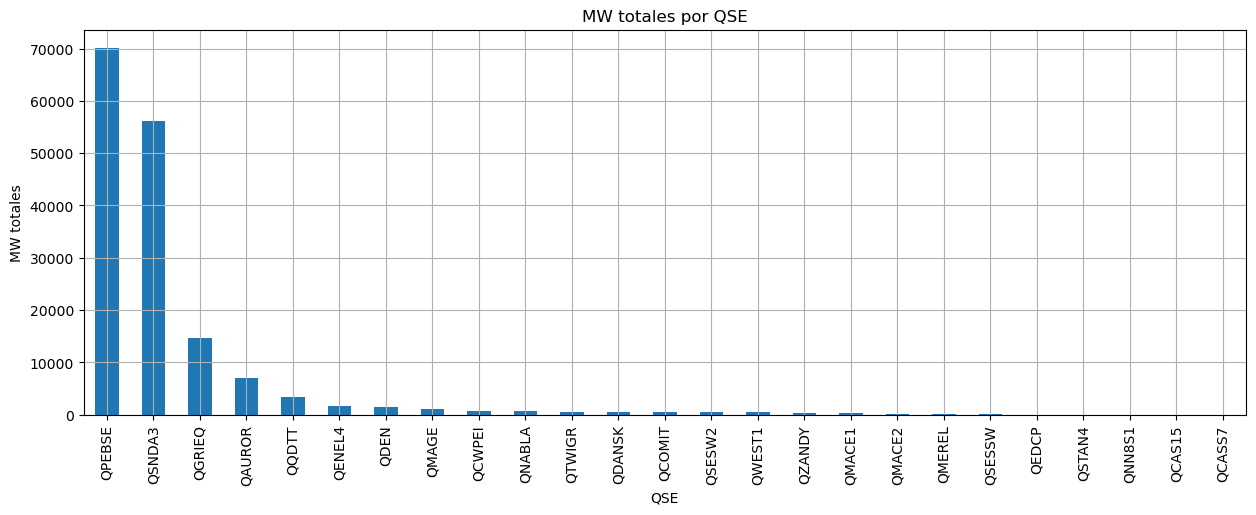

In [35]:
plant_node_bids.groupby(["qseName"]).agg({"MW_totales": "sum"}).sort_values(by="MW_totales", ascending=False).plot(
    kind="bar",
    figsize=(15, 5),
    title="MW totales por QSE",
    ylabel="MW totales",
    xlabel="QSE",
    rot=90,
    legend=False,
    grid=True
)

<Axes: title={'center': 'MW totales por QSE'}, xlabel='QSE', ylabel='MW totales'>

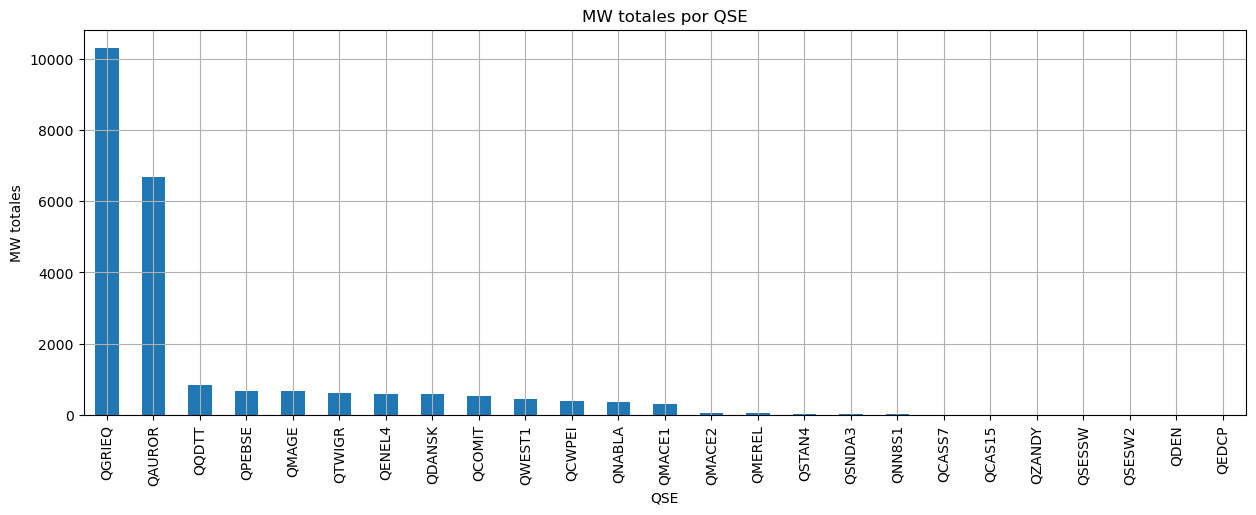

In [36]:
# awarded
plant_node_awarded_bids.groupby(["qseName"]).agg({"energyOnlyBidAwardInMW": "sum"}).sort_values(by="energyOnlyBidAwardInMW", ascending=False).plot(
    kind="bar",
    figsize=(15, 5),
    title="MW totales por QSE",
    ylabel="MW totales",
    xlabel="QSE",
    rot=90,
    legend=False,
    grid=True
)

<Axes: title={'center': 'MW totales por settlementPoint'}, xlabel='settlementPoint', ylabel='MW totales'>

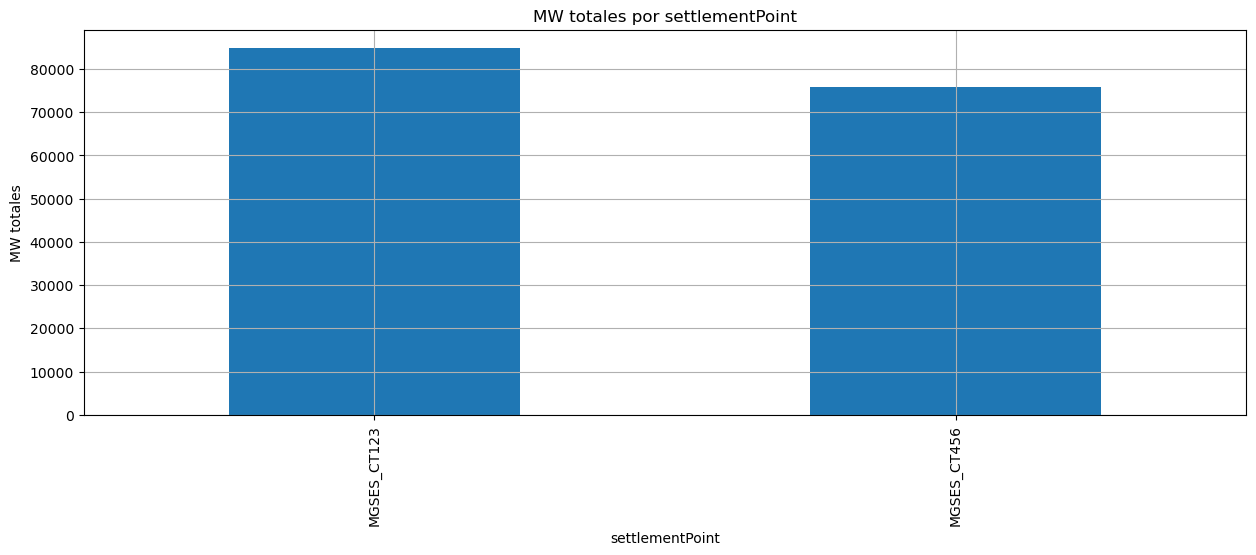

In [37]:
plant_node_bids.groupby(["settlementPointName"]).agg({"MW_totales": "sum"}).sort_values(
    by="MW_totales", ascending=False).plot(
    kind="bar",
    figsize=(15, 5),
    title="MW totales por settlementPoint",
    ylabel="MW totales",
    xlabel="settlementPoint",
    rot=90,
    legend=False,
    grid=True
)

<Axes: title={'center': 'MW totales por settlementPoint'}, xlabel='settlementPoint', ylabel='MW totales'>

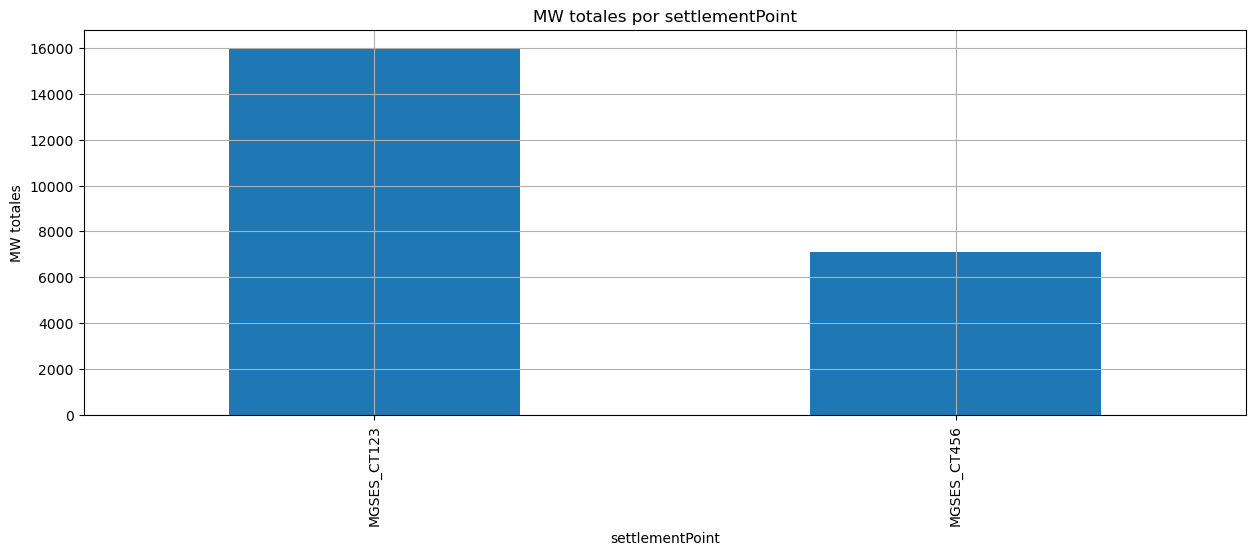

In [38]:
plant_node_awarded_bids.groupby(["settlementPointName"]).agg({"energyOnlyBidAwardInMW": "sum"}).sort_values(
    by="energyOnlyBidAwardInMW", ascending=False).plot(
    kind="bar",
    figsize=(15, 5),
    title="MW totales por settlementPoint",
    ylabel="MW totales",
    xlabel="settlementPoint",
    rot=90,
    legend=False,
    grid=True
)

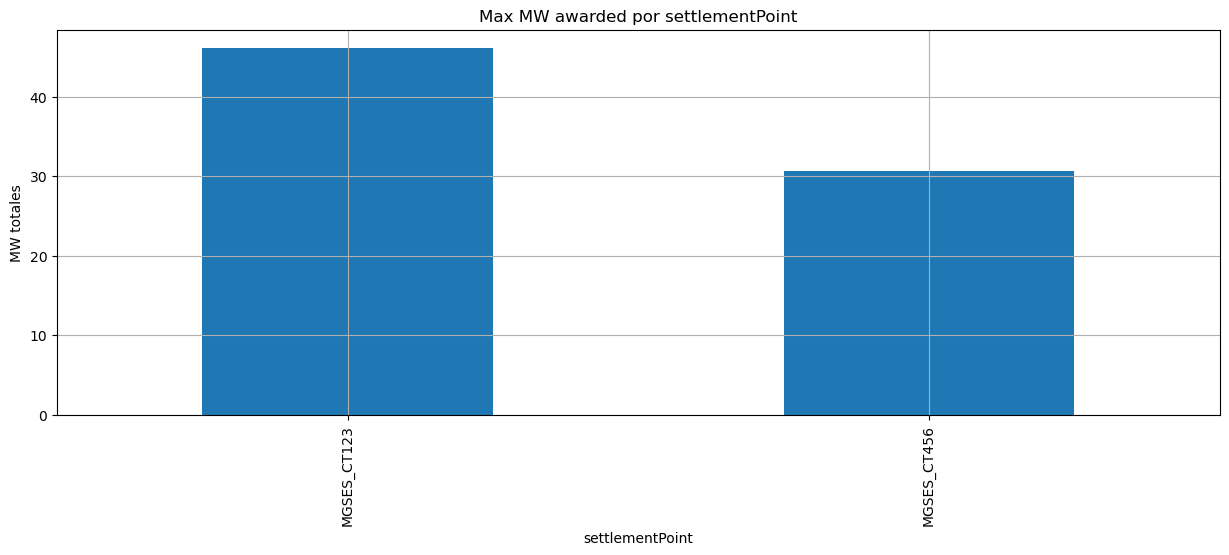

In [39]:
# Maximum awarded by node
hourly_awards = plant_node_awarded_bids.groupby(["date", "settlementPointName"]).agg({"energyOnlyBidAwardInMW": "sum"}).reset_index()
hourly_awards.groupby(["settlementPointName"]).agg({"energyOnlyBidAwardInMW": "max"}).sort_values(
    by="energyOnlyBidAwardInMW", ascending=False).plot(
    kind="bar",
    figsize=(15, 5),
    title="Max MW awarded por settlementPoint",
    ylabel="MW totales",
    xlabel="settlementPoint",
    rot=90,
    legend=False,
    grid=True
);

In [42]:
virtual_trading_data = pd.read_csv('../../ercot_market_study/data/virtual_trading_data.csv')

In [43]:
df_trading = virtual_trading_data[virtual_trading_data.settlementPoint.isin(NODES)].rename(columns={"settlementPoint": "settlementPointName"})
df_trading["date"] = pd.to_datetime(df_trading["date"])

In [47]:
bid_award_with_returns = pd.merge(df_trading, plant_node_awarded_bids, on=["date","settlementPointName"])

In [49]:
bid_award_with_returns["costs"] = bid_award_with_returns["energyOnlyBidAwardInMW"] * bid_award_with_returns["SPP_DA"]
bid_award_with_returns["income"] = bid_award_with_returns["energyOnlyBidAwardInMW"] * bid_award_with_returns["SPP_RT"]
bid_award_with_returns["profit"] = bid_award_with_returns["income"] - bid_award_with_returns["costs"]

<Axes: title={'center': 'Top 10 QSEs by volume'}, xlabel='QSE', ylabel='MW'>

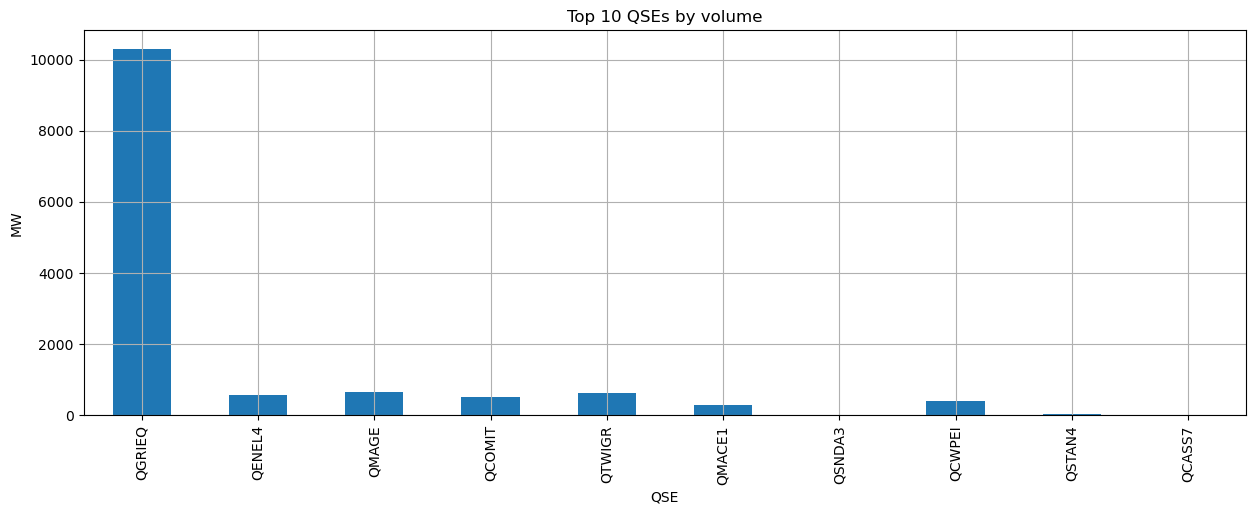

In [71]:
returns_by_qse = bid_award_with_returns.groupby(["date","qseName"]).agg({"profit": "sum", "energyOnlyBidAwardInMW": "sum"}).reset_index()
top10_df = returns_by_qse.groupby(["qseName"]).agg({"profit": "sum", "energyOnlyBidAwardInMW": "sum"}).sort_values(by="profit", ascending=False).head(10)
qses = top10_df.index
# plot top 10 volume as a bar chart
top10_df[["energyOnlyBidAwardInMW"]].plot(
    kind="bar",
    figsize=(15, 5),
    title="Top 10 QSEs by volume",
    ylabel="MW",
    xlabel="QSE",
    rot=90,
    legend=False,
    grid=True
)

<Axes: title={'center': 'Profit por QSE'}, xlabel='date', ylabel='Profit'>

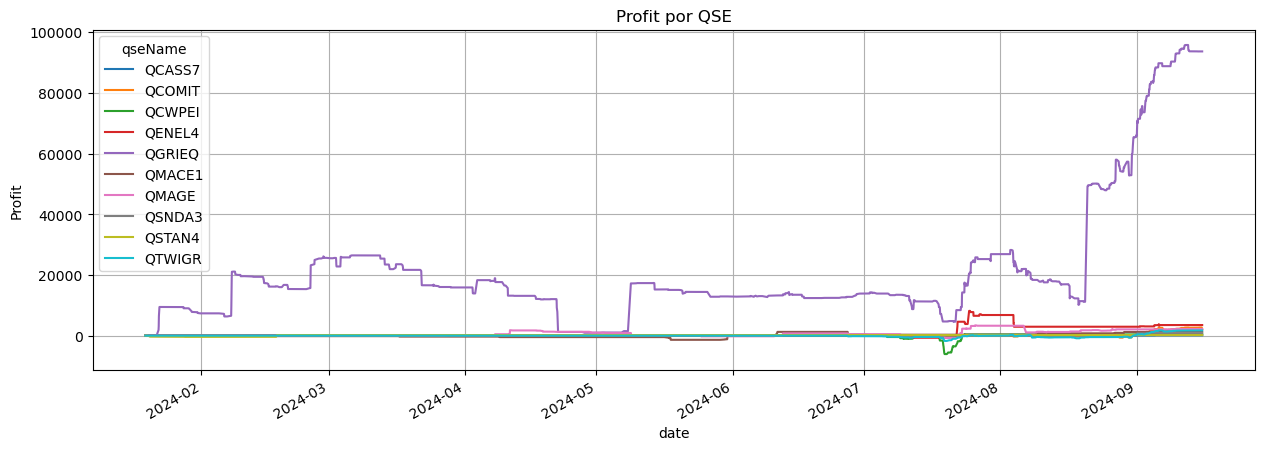

In [83]:
bid_award_with_returns[bid_award_with_returns.qseName.isin(qses)].groupby(["date","qseName"]).agg({"profit": "sum"}).reset_index().pivot(index="date", columns="qseName", values="profit").fillna(0).cumsum().plot(
    figsize=(15, 5),
    title="Profit por QSE",
    ylabel="Profit",
    xlabel="date",
    grid=True
)

In [84]:
# Ofertas de QGRIEQ

In [85]:
qgrieq_bids = df_bids[(df_bids.qseName == "QGRIEQ") & (df_bids.settlementPointName.isin(NODES))]

<Axes: title={'center': 'QGRIEQ bids'}, xlabel='date', ylabel='SPP_DA'>

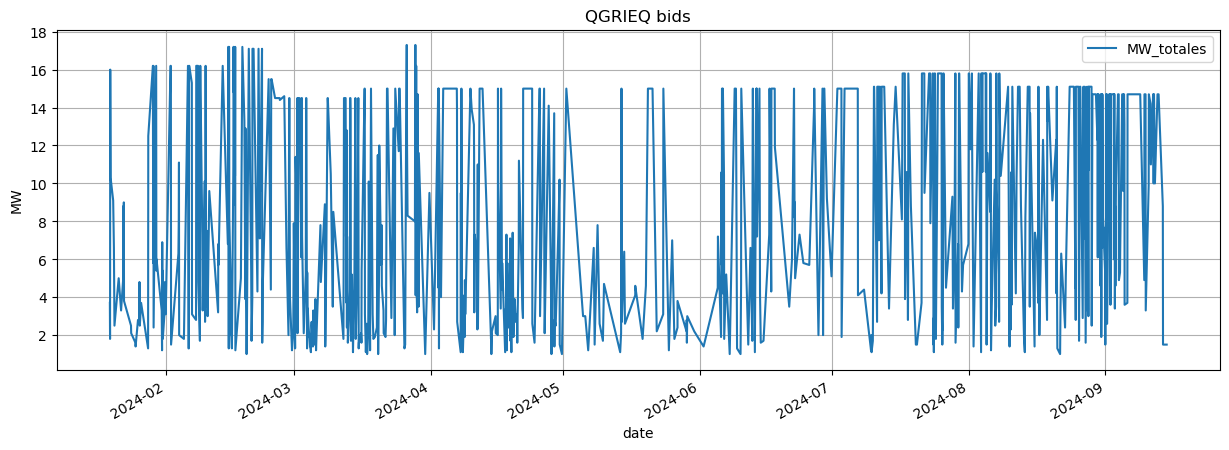

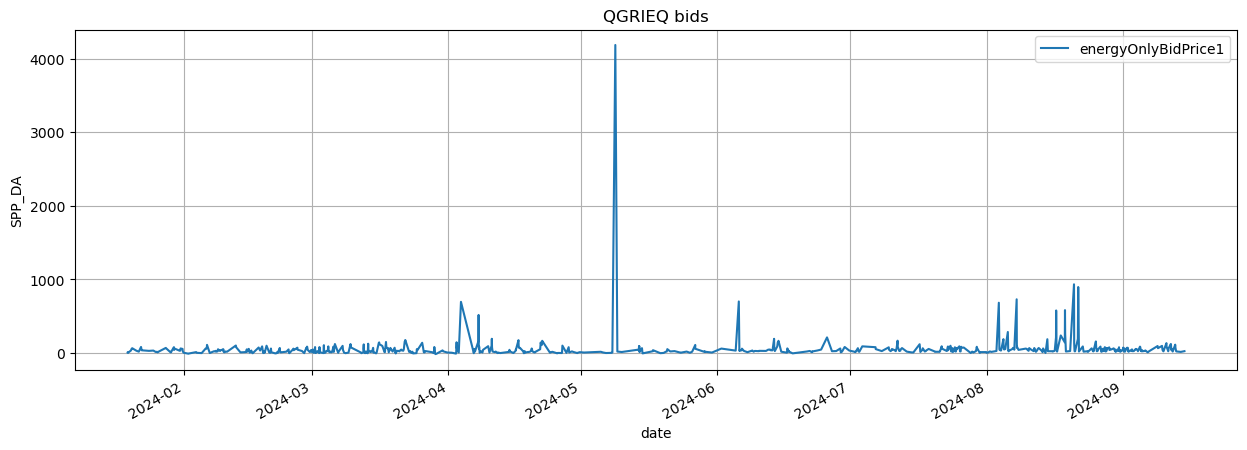

In [86]:
qgrieq_bids[qgrieq_bids.settlementPointName == NODES[0]].sort_values(by='date').plot(x='date', y='MW_totales', figsize=(15, 5), title="QGRIEQ bids", ylabel="MW", xlabel="date", grid=True)
qgrieq_bids[qgrieq_bids.settlementPointName == NODES[0]].sort_values(by='date').plot(x='date', y='energyOnlyBidPrice1', figsize=(15, 5), title="QGRIEQ bids", ylabel="SPP_DA", xlabel="date", grid=True)

<Axes: title={'center': 'QGRIEQ bids'}, xlabel='date', ylabel='SPP_DA'>

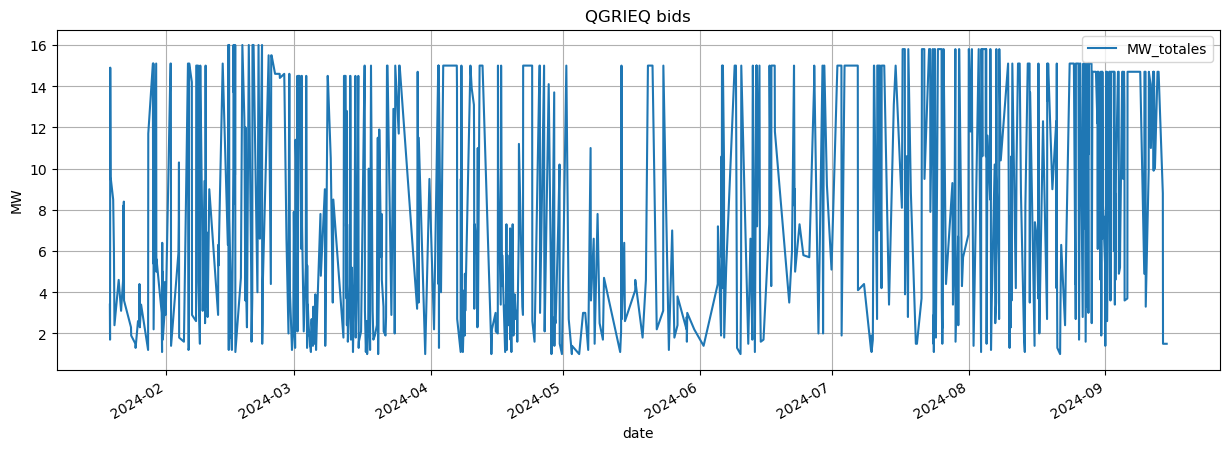

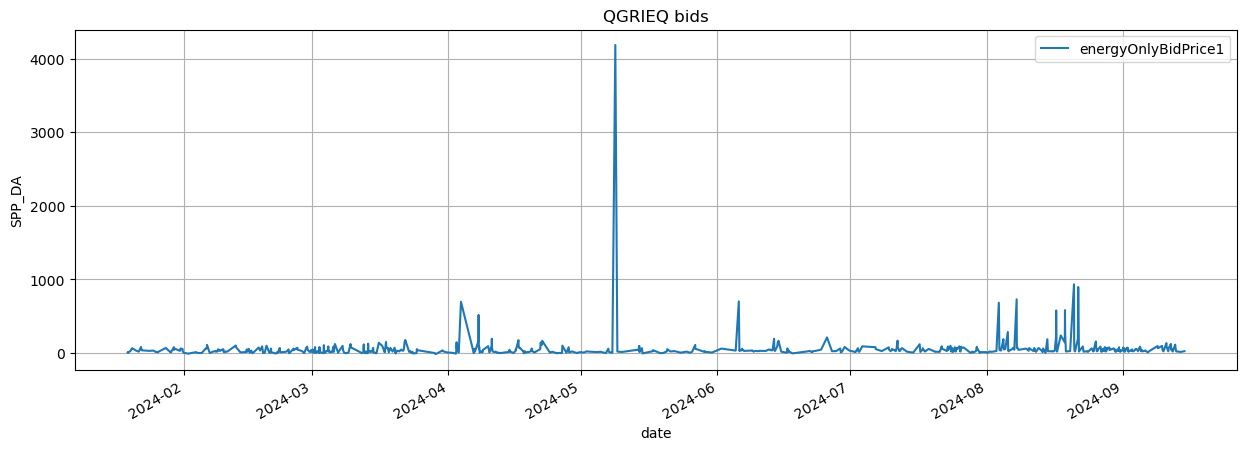

In [87]:
qgrieq_bids[qgrieq_bids.settlementPointName == NODES[1]].sort_values(by='date').plot(x='date', y='MW_totales', figsize=(15, 5), title="QGRIEQ bids", ylabel="MW", xlabel="date", grid=True)
qgrieq_bids[qgrieq_bids.settlementPointName == NODES[1]].sort_values(by='date').plot(x='date', y='energyOnlyBidPrice1', figsize=(15, 5), title="QGRIEQ bids", ylabel="SPP_DA", xlabel="date", grid=True)